# Compound Poisson Process and VaR Approximation

<img src="img/H5P1Q2.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [2]:
lam = 100
miu = 0.1
sig = 0.4
M = 1000000

In [3]:
n_emp = np.random.poisson(lam, M)
n_emp

array([102, 101, 119, ..., 101,  99, 106])

In [4]:
n_sum = n_emp.sum()
n_sum

100008550

In [5]:
np.mean(n_emp)

100.00855

In [6]:
x = np.random.lognormal(miu, sig, n_sum)
x

array([0.48147499, 0.70224391, 1.17918022, ..., 2.57774408, 1.3051138 ,
       0.89196427])

In [7]:
nsum = 0
sn = []
for i in range(len(n_emp)):
    n = n_emp[i]
    s = x[nsum:nsum+n].sum()
    sn.append(s)
    nsum += n

In [8]:
sn = np.array(sn)

In [9]:
var95 = np.quantile(sn, 0.95, interpolation='higher')
var95

141.48754602735485

In [10]:
var99999 = np.quantile(sn, 0.99999, interpolation='higher')
var99999

180.07761048139963

### Normal Distribution

In [11]:
sn_norm = np.random.normal(sn.mean(), sn.std(), M)

In [12]:
x = np.arange(0.95, 0.9999900000001, (0.99999-0.95)/99)
y_sn = [len(sn[sn>np.quantile(sn, i, interpolation='higher')])/M for i in x]
y_sn_norm = [len(sn_norm[sn_norm>np.quantile(sn_norm, i, interpolation='higher')])/M for i in x]

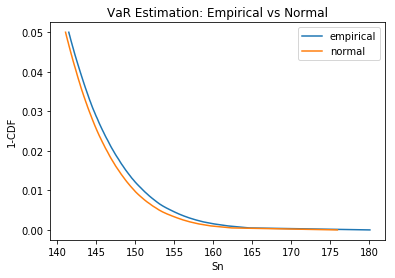

In [13]:
plt.plot(np.quantile(sn,x,interpolation='higher'), y_sn, label='empirical')
plt.plot(np.quantile(sn_norm,x,interpolation='higher'), y_sn_norm, label='normal')
plt.title("VaR Estimation: Empirical vs Normal")
plt.xlabel("Sn")
plt.ylabel("1-CDF")
plt.legend()
plt.show()

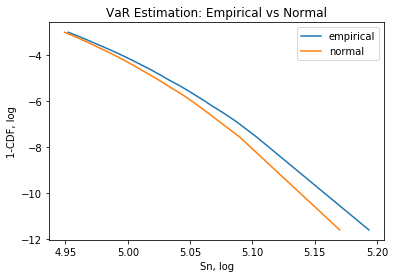

In [14]:
plt.plot(np.log(np.quantile(sn,x,interpolation='higher')), np.log(y_sn), label='empirical')
plt.plot(np.log(np.quantile(sn_norm,x,interpolation='higher')), np.log(y_sn_norm), label='normal')
plt.title("VaR Estimation: Empirical vs Normal")
plt.xlabel("Sn, log")
plt.ylabel("1-CDF, log")
plt.legend()
plt.show()

### Gamma Distribution

In [15]:
alpha, k, beta = gamma.fit(sn)
alpha, k, beta

(250.54797792197257, -85.47934937252079, 0.8189923617805399)

In [16]:
sn_gamma = gamma.rvs(alpha, k, beta, M)

In [17]:
y_sn_gamma = [len(sn_gamma[sn_gamma>np.quantile(sn_gamma, i, interpolation='higher')])/M for i in x]

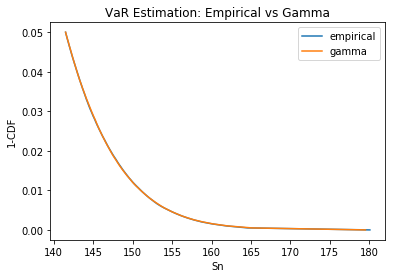

In [18]:
plt.plot(np.quantile(sn,x,interpolation='higher'), y_sn, label='empirical')
plt.plot(np.quantile(sn_gamma,x,interpolation='higher'), y_sn_gamma, label='gamma')
plt.title("VaR Estimation: Empirical vs Gamma")
plt.xlabel("Sn")
plt.ylabel("1-CDF")
plt.legend()
plt.show()

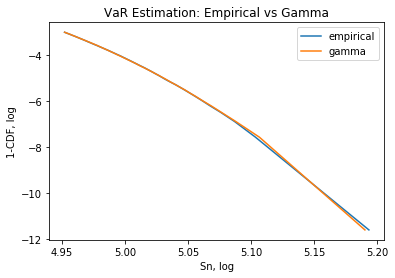

In [19]:
plt.plot(np.log(np.quantile(sn,x,interpolation='higher')), np.log(y_sn), label='empirical')
plt.plot(np.log(np.quantile(sn_gamma,x,interpolation='higher')), np.log(y_sn_gamma), label='gamma')
plt.title("VaR Estimation: Empirical vs Gamma")
plt.xlabel("Sn, log")
plt.ylabel("1-CDF, log")
plt.legend()
plt.show()